In [1]:
import pandas as pd
import getpass
from functions import connect_mysql, mysql_list
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
# Input User id
try:
    # password input hashed
    id = getpass.getpass("id: ") 
except Exception as ex:
    print('Error Occured : ', ex)
#Input password
try:
    # password input hashed
    pwd = getpass.getpass("password: ") 
except Exception as ex:
    print('Error Occured : ', ex)

#host for RDS connection
host = "mdsi-dsp-spr-2020.cehiwpryiego.ap-southeast-2.rds.amazonaws.com"
mydb = connect_mysql(host, id, pwd)

if mydb: 
    print("Connection Successful")
    

id: ········
password: ········
Connection Successful


In [2]:
from functions import mysql_list
mydb = connect_mysql(host, id, pwd)
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES;")
# create a list of database
db_list = mysql_list(mycursor.fetchall())
print(db_list) 
# asx is the database to be used
db = "asx"

['asx', 'information_schema', 'mysql', 'performance_schema']


In [3]:
mydb = connect_mysql(host, id, pwd, db)
mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES;")
tb_list = mysql_list(mycursor.fetchall())
print(tb_list)

['GDP_history_year', 'asx200', 'asx_all', 'asx_history', 'cashrate', 'exchange_rate']


In [4]:

mydb = connect_mysql(host, id, pwd, db)

for tb in tb_list:
    print(tb)


GDP_history_year
asx200
asx_all
asx_history
cashrate
exchange_rate


,Code,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2015-10-05,ASX,39.00,39.15,38.63,38.99,32.59202,408405
2015-10-06,ASX,39.20,39.30,38.91,39.03,32.62545,367640
2015-10-07,ASX,39.30,39.70,38.54,39.00,32.60038,468017
2015-10-08,ASX,38.91,39.31,38.83,38.97,32.57530,394003
2015-10-09,ASX,39.26,39.39,39.07,39.25,32.80936,557841


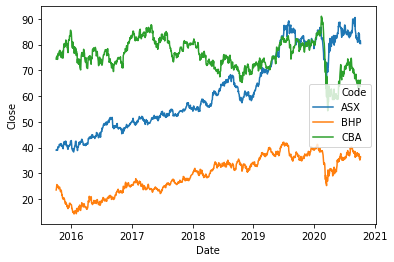

In [5]:
mydb = connect_mysql(host, id, pwd, db)

df = pd.read_sql_query("SELECT * FROM asx_history WHERE Code in ('ASX', 'BHP', 'CBA')", con=mydb, index_col = "Date")
mydb.close()
display(df.head())
sns.lineplot(x = df.index, y = "Close", data = df, hue = "Code")
plt.show()
